<a href="https://colab.research.google.com/github/shumshersubashgautam/KU-Research-Gait_Analysis/blob/main/gaitanalysis_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 from google.colab import drive 
 drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
!cp /content/gdrive/MyDrive/gait-final-joint-angles-dataset.csv /content/gaitphase/

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline


import os
for dirname, _, filenames in os.walk('/content/gaitphase/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/gaitphase/gait-final-joint-angles-dataset.csv


In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
data = '/content/gaitphase/gait-final-joint-angles-dataset.csv'

df = pd.read_csv(data)

In [8]:
df.shape

(2969, 4)

In [9]:
df.head()

,hip-angle,knee-angle,ankle-angle,phase
0,19.033295,2.793752,66.436670,1
1,20.733910,3.179830,67.298731,1
2,21.417248,3.179830,67.298731,1
3,22.349802,3.881837,68.013458,1
4,23.864921,5.276593,67.878058,1


In [10]:
df.columns

Index(['hip-angle', 'knee-angle', 'ankle-angle', 'phase'], dtype='object')

In [12]:
X = df.drop(['phase'], axis=1)

y = df['phase']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
X_train.shape, X_test.shape

((2375, 3), (594, 3))

In [15]:
cols = X_train.columns

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [17]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [18]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [19]:
X_train.describe()

,hip-angle,knee-angle,ankle-angle
count,2.375000e+03,2.375000e+03,2.375000e+03
mean,-9.798010e-17,8.975277e-18,-5.011196e-16
std,1.000211e+00,1.000211e+00,1.000211e+00
min,-1.516804e+00,-1.093108e+00,-6.868330e+00
25%,-9.544322e-01,-7.975618e-01,-8.762075e-01
50%,1.465254e-01,-4.396229e-01,1.132222e-01
75%,8.302572e-01,5.251137e-01,7.693317e-01
max,2.211776e+00,3.404636e+00,2.863123e+00


In [20]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc=SVC() 
svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)

print('Model accuracy : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy : 0.9646


In [21]:
svc=SVC(C=100.0) 
svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)

print('C=100.0 Model accuracy with rbf kernel : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

C=100.0 Model accuracy with rbf kernel : 0.9663


In [22]:
linear_svc=SVC(kernel='linear', C=1.0) 
linear_svc.fit(X_train,y_train)

y_pred_test=linear_svc.predict(X_test)

print('C=1.0 Model accuracy with linear kernel : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

C=1.0 Model accuracy with linear kernel : 0.9478


In [23]:
linear_svc=SVC(kernel='linear', C=10.0) 
linear_svc.fit(X_train,y_train)

y_pred_test=linear_svc.predict(X_test)

print('C=10.0 Model accuracy with linear kernel : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

C=10.0 Model accuracy with linear kernel : 0.9461


In [24]:
linear_svc=SVC(kernel='linear', C=100.0) 
linear_svc.fit(X_train,y_train)

y_pred_test=linear_svc.predict(X_test)

print('C=100.0 Model accuracy with linear kernel : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

C=100.0 Model accuracy with linear kernel : 0.9461


In [25]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 87  22]
 [ 10 475]]

True Positives(TP) =  87

True Negatives(TN) =  475

False Positives(FP) =  22

False Negatives(FN) =  10


<Axes: >

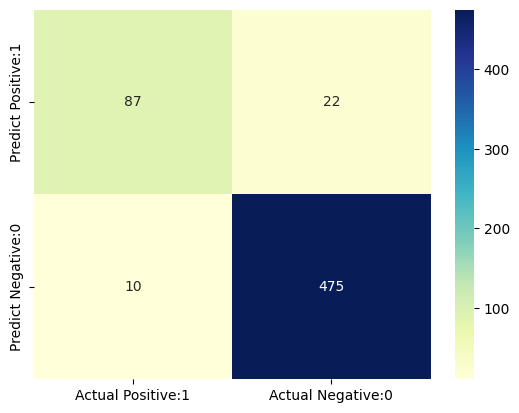

In [26]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.90      0.80      0.84       109
           1       0.96      0.98      0.97       485

    accuracy                           0.95       594
   macro avg       0.93      0.89      0.91       594
weighted avg       0.94      0.95      0.94       594



In [28]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


kfold=KFold(n_splits=5, shuffle=True, random_state=0)


linear_svc=SVC(kernel='linear')


linear_scores = cross_val_score(linear_svc, X, y, cv=kfold)

In [29]:
print('Cross-validation with linear kernel:\n\n{}'.format(linear_scores))

Cross-validation with linear kernel:

[0.94612795 0.95791246 0.93939394 0.95791246 0.95784148]


In [30]:
print('Average cross-validation with linear kernel:{:.4f}'.format(linear_scores.mean()))

Average cross-validation with linear kernel:0.9518


In [31]:
rbf_svc=SVC(kernel='rbf')

rbf_scores = cross_val_score(rbf_svc, X, y, cv=kfold)

In [32]:
print('Cross-validation with rbf kernel:\n\n{}'.format(rbf_scores))

Cross-validation with rbf kernel:

[0.95959596 0.97138047 0.95622896 0.96632997 0.96795953]


In [33]:
print('Average cross-validation with rbf kernel:{:.4f}'.format(rbf_scores.mean()))

Average cross-validation with rbf kernel:0.9643


In [34]:
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC

svc=SVC() 


parameters = [ {'C':[1, 10, 50], 'kernel':['linear']},
               {'C':[1, 10, 50], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.5, 0.9]}
              ]




grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 50], 'kernel': ['linear']},
                         {'C': [1, 10, 50], 'gamma': [0.1, 0.2, 0.5, 0.9],
                          'kernel': ['rbf']}],
             scoring='accuracy')

In [35]:
print('GridSearch CV best: {:.4f}\n\n'.format(grid_search.best_score_))


print('Best results :','\n\n', (grid_search.best_params_))

GridSearch CV best: 0.9739


Best results : 

 {'C': 10, 'gamma': 0.9, 'kernel': 'rbf'}
